In [1]:
import h5py
import numpy as np
from collections import defaultdict
import pandas as pd 

from plotting_tools import *
import geopandas as gpd

In [2]:
file_path = "../../data/memilio_input/"

In [3]:
df_ABM_loc_size = pd.read_csv(file_path + "../0_size_per_loc.txt", sep=" ", header=None, dtype={0: str})
df_ABM_loc_size.columns = ["loc", "n_Agents"]

def location_type(loc):
    """
    Function to determine the type of location based on its name.
    """
    if loc.startswith("00"):
        return "home"
    elif loc.startswith("01"):
        return "school"
    elif loc.startswith("02"):
        return "work"
    elif loc.startswith("03"):
        return "social event"
    elif loc.startswith("04"):
        return "Shop"
    elif loc.startswith("05"):
        return "Hospital"
    elif loc.startswith("06"):
        return "ICU"
    elif loc.startswith("10"):
        return "Cemetery"
    else:
        return "Unknown"
    
df_ABM_loc_size["loc_type"] = df_ABM_loc_size["loc"].apply(location_type)

In [4]:
df_ABM_loc_size.head()

,loc,n_Agents,loc_type
0,00100000,1,home
1,001000000,5,home
2,001000001,2,home
3,001000002,1,home
4,001000003,1,home


In [24]:
df_ABM_tan_loc_mapping = pd.read_csv(file_path + "../1_mapping_tan_locs.txt", sep=" ", header=None, index_col=None, dtype={0: str}).iloc[:,:2]
df_ABM_tan_loc_mapping.columns = ["loc", "tan_loc"]

In [26]:
df_loc = pd.merge(df_ABM_loc_size, df_ABM_tan_loc_mapping, on="loc", how="outer")

In [31]:
df_loc.loc[df_loc.tan_loc==64].groupby("loc_type").agg({"n_Agents": "sum"}).reset_index().sort_values("n_Agents", ascending=False)

,loc_type,n_Agents
3,social event,7784.0
1,home,7174.0
0,Shop,5370.0
4,work,3306.0
2,school,316.0


In [30]:
df_loc.loc[df_loc.tan_loc==234].groupby("loc_type").agg({"n_Agents": "sum"}).reset_index().sort_values("n_Agents", ascending=False)

,loc_type,n_Agents
1,home,7136.0
0,Shop,5143.0
3,social event,4898.0
4,work,2544.0
2,school,631.0


In [35]:
255577.0+197302.0

452879.0

In [39]:
1005+315

1320

In [38]:
(1955-1005)/3

316.6666666666667

In [34]:
df_loc.groupby("loc_type").agg({"n_Agents": "max"}).reset_index().sort_values("n_Agents", ascending=False)

,loc_type,n_Agents
1,ICU,255577.0
0,Hospital,197302.0
5,social event,3829.0
2,Shop,1605.0
6,work,970.0
4,school,768.0
3,home,7.0


In [33]:
df_loc.loc[df_loc.tan_loc==64].groupby("loc_type").agg({"n_Agents": "max"}).reset_index().sort_values("n_Agents", ascending=False)

,loc_type,n_Agents
3,social event,2001.0
0,Shop,867.0
4,work,792.0
2,school,316.0
1,home,7.0


In [32]:
df_loc.loc[df_loc.tan_loc==234].groupby("loc_type").agg({"n_Agents": "max"}).reset_index().sort_values("n_Agents", ascending=False)

,loc_type,n_Agents
0,Shop,1605.0
3,social event,634.0
2,school,631.0
4,work,146.0
1,home,7.0


In [ ]:
df_loc.loc[df_loc.tan_loc==].groupby("loc_type").agg({"n_Agents": "sum"}).reset_index().sort_values("n_Agents", ascending=False)

In [ ]:
8743027

In [24]:
1536985*4 < df_ABM_loc_size.n_Agents.sum()

np.True_

In [19]:
df =pd.read_csv(file_path+"persons.csv")
shape_file = gpd.read_file(file_path+"Munich_shape250319/Verschnitt_DLR_TAN_Rep.shp")


In [20]:
df.head()

,Unnamed: 0,puid,age,home_zone,home_id,shop_zone,shop_id,event_zone,event_id,work_zone,work_id,school_zone,school_id
0,0,863051,50,91620671,86305,91620671,14601362,91620671,14601315,91820112,14829646,-2,-2
1,1,863791,50,91620691,86379,91620691,14629079,91620691,14625743,91820112,14829638,-2,-2
2,2,883451,50,91620811,88345,91820012,14582286,91620811,14598482,91820112,14829614,-2,-2
3,3,1247641,51,91620521,124764,91620521,14393929,91620521,14397895,91620521,14395347,-2,-2
4,4,1257601,57,91620591,125760,91620591,14425142,91820025,14828673,91870042,15454696,-2,-2


In [21]:
df.shape

(1536985, 13)

In [29]:
memilio_zone = shape_file.loc[shape_file["ID_TAN"]==64, "id_n"].iloc[0]

In [36]:
shape_file.loc[shape_file["id_n"]==memilio_zone]

,id,geom,id_n,ags,gen,ind,ID_TAN,geometry
53,4613,0106000020E6100000010000000103000000010000001B...,91620111,9162000,München,4612,64,"POLYGON ((691190.778 5343013.348, 691189.657 5..."
104,4613,0106000020E6100000010000000103000000010000001B...,91620111,9162000,München,4612,234,"POLYGON ((690524.966 5343093.232, 690190.114 5..."


<Axes: >

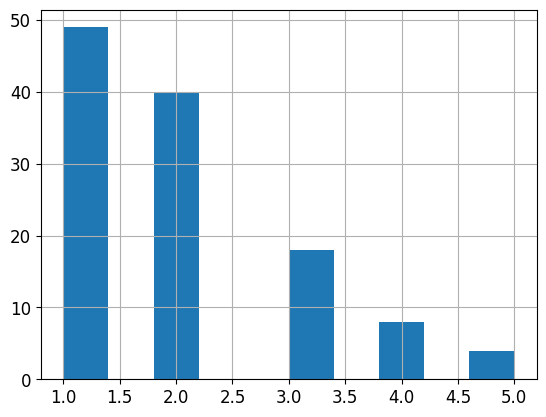

In [41]:
shape_file.groupby("id_n")["ID_TAN"].count().hist()

In [33]:
citizens = df.loc[df["home_zone"]==memilio_zone, :].shape[0]

citizens_and_working_in_zone = df.loc[(df["home_zone"]==memilio_zone)&(df["work_zone"]==memilio_zone), :].shape[0]
citizens_and_working_outside_zone = df.loc[(df["home_zone"]==memilio_zone)&(df["work_zone"]!=memilio_zone), :].shape[0]

print(f"Citizens in zone {memilio_zone}: {citizens}")
print(f"Citizens working in zone {memilio_zone}: {citizens_and_working_in_zone}")
print(f"Citizens working outside zone {memilio_zone}: {citizens_and_working_outside_zone}")

Citizens in zone 91620111: 14349
Citizens working in zone 91620111: 3465
Citizens working outside zone 91620111: 10884


### Questions

kommen in 64 neue agenten rein / wie viele? 
wie viele locations sind da? 

3 Tage rauspicken und zu welchen Tageszeiten geht das hoch und runter? 